# EDA

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Import biketrips
df = pd.read_csv('Cleaned_Austin_CapMetroBike_Trips.csv')

#Check head
df.head()

,trip_id,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,month,year,time_of_day,day_of_week,checkout_day,hour,time_period,checkout_kisok
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,2017-12-01,09:51:41,2496,8th & Congress,2495,4th & Congress,3,12,2017,AM,Friday,1,9,Off-Peak,8th & Congress
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,2015-03-13,16:20:24,2495,4th & Congress,2495,4th & Congress,14,3,2015,PM,Friday,13,16,Evening Rush,4th & Congress
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,2575,Riverside & South Lamar,22,10,2014,AM,Tuesday,14,8,Morning Commute,Toomey Rd @ South Lamar
3,3454592,Local365,646,classic,10/14/2014 08:32:03 AM,2014-10-14,08:32:03,2552,3rd & West,2496,8th & Congress,29,10,2014,AM,Tuesday,14,8,Morning Commute,3rd & West
4,4106421,24 Hour Walk Up Pass,124,classic,03/13/2015 04:20:15 PM,2015-03-13,16:20:15,2498,Dean Keeton & Speedway,2549,Long Center @ South 1st & Riverside,10,3,2015,PM,Friday,13,16,Evening Rush,Dean Keeton & Speedway


In [4]:
#Drop duplicate checkout_kiosk column
df.drop(columns='checkout_kisok',inplace=True)

In [4]:
df.columns

Index(['trip_id', 'membership_type', 'bicycle_id', 'bike_type',
       'checkout_datetime', 'checkout_date', 'checkout_time',
       'checkout_kiosk_id', 'checkout_kiosk', 'return_kiosk_id',
       'return_kiosk', 'trip_duration_minutes', 'month', 'year', 'time_of_day',
       'day_of_week', 'checkout_day', 'hour', 'time_period'],
      dtype='object')

In [25]:
df.dtypes

trip_id                   int64
membership_type          object
bicycle_id               object
bike_type                object
checkout_datetime        object
checkout_date            object
checkout_time            object
checkout_kiosk_id         int64
checkout_kiosk           object
return_kiosk_id           int64
return_kiosk             object
trip_duration_minutes     int64
month                     int64
year                      int64
time_of_day              object
day_of_week              object
checkout_day              int64
hour                      int64
time_period              object
dtype: object

## Metadata

In [30]:
#Create dataframe describing columns
metadata = pd.DataFrame({
    'column_name': [
        'trip_id', 'membership_type', 'bicycle_id', 'bike_type', 'checkout_datetime',
        'checkout_date', 'checkout_time', 'checkout_kiosk_id', 'checkout_kiosk',
        'return_kiosk_id', 'return_kiosk', 'trip_duration_minutes', 'month', 'year',
        'time_of_day', 'day_of_week', 'checkout_day', 'hour', 'time_period'
    ],
    'data_type': [
        'object', 'object', 'object', 'object', 'object', 'object', 'int64',
        'object', 'object', 'int64', 'object', 'int64', 'int64', 'int64',
        'object', 'int64', 'int64', 'int64', 'object'  
    ],
    'description': [
        'The Metro Bike Trips Unique ID',
        'The membership type of the Metro Bike user',
        "The Metro Bike's ID that was used during the trip",
        'The type of bike used during the trip',
        'The date and time that the bike was checked out from the kiosk',
        'The date the bike was checked out from the kiosk',
        'The time the bike was checked out from the kiosk',
        'The Kiosk ID of the Kiosk that was used to checkout the bike',
        'The location of the Kiosk',
        'The ID of the kiosk that was used to return the bike',
        'The location of the Kiosk the bike was returned to',
        'The total number of minutes the bike was checked out',
        'The calendar month of the trip',
        'The year of the trip',
        'The time of the day the trip took place (AM or PM)',
        'The day of the week of the trip',
        'The calendar day the bike was checked out',
        'The hour of the day the bike was checked out',
        'The time period of the day the bike was checked out at, more on this later.'
    ]
})


#Set display option to allow showing full column contents
pd.set_option('display.max_colwidth', None)

#Display
metadata


,column_name,data_type,description
0,trip_id,object,The Metro Bike Trips Unique ID
1,membership_type,object,The membership type of the Metro Bike user
2,bicycle_id,object,The Metro Bike's ID that was used during the trip
3,bike_type,object,The type of bike used during the trip
4,checkout_datetime,object,The date and time that the bike was checked out from the kiosk
5,checkout_date,object,The date the bike was checked out from the kiosk
6,checkout_time,int64,The time the bike was checked out from the kiosk
7,checkout_kiosk_id,object,The Kiosk ID of the Kiosk that was used to checkout the bike
8,checkout_kiosk,object,The location of the Kiosk
9,return_kiosk_id,int64,The ID of the kiosk that was used to return the bike


#### **Time Period Classification**

**Morning Commute**
- **Hours**: 7 - 9 AM

**Lunch Break**
- **Hours**: 11 AM - 2 PM

**Afternoon Surge**
- **Hours**: 2 - 4 PM

**Evening Rush**
- **Hours**: 4 - 6 PM

**Evening Leisure**
- **Hours**: 6 - 9 PM

**Late Night**
- **Hours**: 9 PM - 12 AM

**Off-Peak**
- **Hours**: 12 - 6 AM

## Overview

In [8]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269215 entries, 0 to 2269214
Data columns (total 20 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   trip_id                int64 
 1   membership_type        object
 2   bicycle_id             object
 3   bike_type              object
 4   checkout_datetime      object
 5   checkout_date          object
 6   checkout_time          object
 7   checkout_kiosk_id      int64 
 8   checkout_kiosk         object
 9   return_kiosk_id        int64 
 10  return_kiosk           object
 11  trip_duration_minutes  int64 
 12  month                  int64 
 13  year                   int64 
 14  time_of_day            object
 15  day_of_week            object
 16  checkout_day           int64 
 17  hour                   int64 
 18  time_period            object
 19  checkout_kisok         object
dtypes: int64(8), object(12)
memory usage: 346.3+ MB


In [4]:
#Check shape
df.shape

(2269215, 19)

**19 columns and about 2 million rows of data**

In [5]:
#Set display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [33]:
#Check statistics
df.describe()

,trip_id,checkout_kiosk_id,return_kiosk_id,trip_duration_minutes,month,year,checkout_day,hour
count,2269215.00,2269215.00,2269215.00,2269215.00,2269215.00,2269215.00,2269215.00,2269215.00
mean,19821855.33,3251.17,3240.78,27.06,6.32,2019.23,15.53,14.44
std,8978109.70,1032.92,1022.68,70.25,3.27,3.06,8.78,4.67
min,1954839.00,1001.00,0.00,2.00,1.00,2013.00,1.00,0.00
25%,14184847.50,2547.00,2547.00,6.00,3.00,2017.00,8.00,12.00
50%,19534723.00,2707.00,2707.00,11.00,6.00,2019.00,15.00,15.00
75%,27494482.50,3797.00,3797.00,27.00,9.00,2022.00,23.00,18.00
max,33869739.00,7637.00,7637.00,1439.00,12.00,2024.00,31.00,23.00


In [34]:
df.describe(include='O')

,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk,return_kiosk,time_of_day,day_of_week,time_period
count,2269215,2269215,2269215,2269215,2269215,2269215,2269215,2269215,2269215,2269215,2269215
unique,49,1023,2,2248051,3851,82873,116,118,2,7,7
top,Student Membership,18947,classic,04/27/2018 04:24:07 PM,2015-03-19,13:53:53,21st & Speedway @ PCL,21st & Speedway @ PCL,PM,Saturday,Lunch Break
freq,430314,3992,1346101,8,2924,89,179675,183330,1711670,399709,497839


**Data ranges from 2013 to 2024**

In [31]:
#Display dataframe again
df.head()

,trip_id,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,month,year,time_of_day,day_of_week,checkout_day,hour,time_period
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,2017-12-01,09:51:41,2496,8th & Congress,2495,4th & Congress,3,12,2017,AM,Friday,1,9,Off-Peak
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,2015-03-13,16:20:24,2495,4th & Congress,2495,4th & Congress,14,3,2015,PM,Friday,13,16,Evening Rush
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,2575,Riverside & South Lamar,22,10,2014,AM,Tuesday,14,8,Morning Commute
3,3454592,Local365,646,classic,10/14/2014 08:32:03 AM,2014-10-14,08:32:03,2552,3rd & West,2496,8th & Congress,29,10,2014,AM,Tuesday,14,8,Morning Commute
4,4106421,24 Hour Walk Up Pass,124,classic,03/13/2015 04:20:15 PM,2015-03-13,16:20:15,2498,Dean Keeton & Speedway,2549,Long Center @ South 1st & Riverside,10,3,2015,PM,Friday,13,16,Evening Rush


In [6]:
#Set figure size
plt.rcParams.update({'figure.figsize':(8,6)})

## Univariate Analysis (1 Varaible)

### Membership_type

In [ ]:
#Get a list of all the different types of memberships 
df['membership_type'].unique()

array(['Local365', '24 Hour Walk Up Pass', 'Local30', 'Weekender',
       'Walk Up', '7-Day', 'Local31', 'Explorer', 'Annual Membership',
       'Semester Membership', 'Founding Member', 'RideScout Single Ride',
       '3-Day Weekender', 'Weekender ($15 plus tax)',
       'Local365 ($80 plus tax)', 'Local30 ($11 plus tax)', 'Annual Pass',
       'Annual Pass (Original)', 'Heartland Pass (Annual Pay)',
       'Student Membership', 'FunFunFun Fest 3 Day Pass',
       'Local365+Guest Pass', 'ACL Weekend Pass Special',
       'Try Before You Buy Special', 'Pay-as-you-ride',
       'Local365 Youth with helmet (age 13-17 riders)',
       'Annual Plus Membership', 'Republic Rider (Annual)',
       'UT Student Membership', 'Denver B-cycle Founder', 'Unknown',
       'HT Ram Membership', 'Single Trip Ride', '3-Day Explorer',
       '$1 Pay by Trip Fall Special', 'Local365 Youth (age 13-17 riders)',
       'One Year Membership', 'RESTRICTED', 'Explorer ($8 plus tax)',
       'Republic Rider', 'A

In [26]:
#Find the top 15 most used memberships
membership_type = df['membership_type'].value_counts().head(15)
membership_type

membership_type
Student Membership       430314
Local365                 389214
UT Student Membership    289045
24 Hour Walk Up Pass     272371
Walk Up                  259842
Local31                  162124
Explorer                 120156
Pay-as-you-ride           82608
Local30                   55763
Single Trip Ride          55031
3-Day Weekender           51744
Weekender                 40495
Local365+Guest Pass       13993
Founding Member            6077
3-Day Explorer             6012
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_2044\3591059643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(membership_type, orient='h',palette='mako')


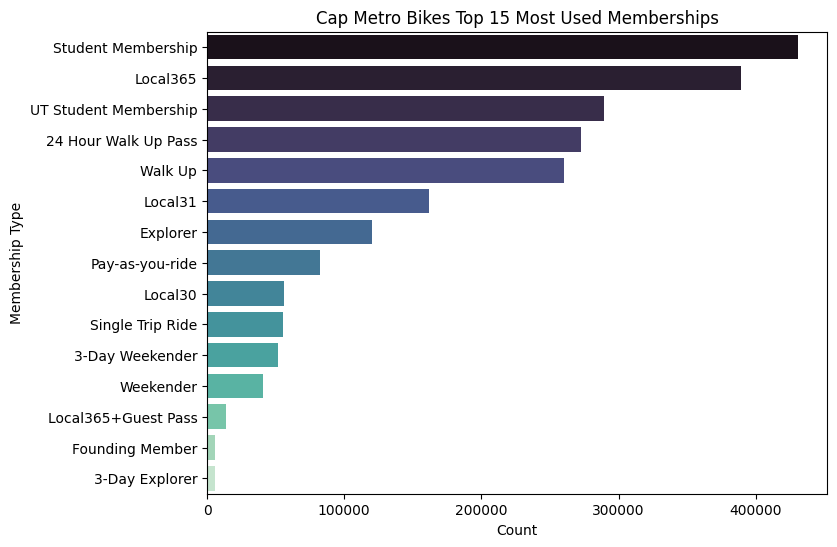

In [8]:
#Display the top 15 most used memberships
sns.barplot(membership_type, orient='h',palette='mako')
plt.xlabel('Count')
plt.ylabel('Membership Type')
plt.title('Cap Metro Bikes Top 15 Most Used Memberships')
plt.show()

### Bike Type

In [22]:
#Get a unique list of all the different types of bike
df['bike_type'].unique()

array(['classic', 'electric'], dtype=object)

In [7]:
#Find out which bike is used most
bike_types = df['bike_type'].value_counts()
bike_types

bike_type
classic     1346101
electric     923114
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\2765363747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bike_types, palette='mako')


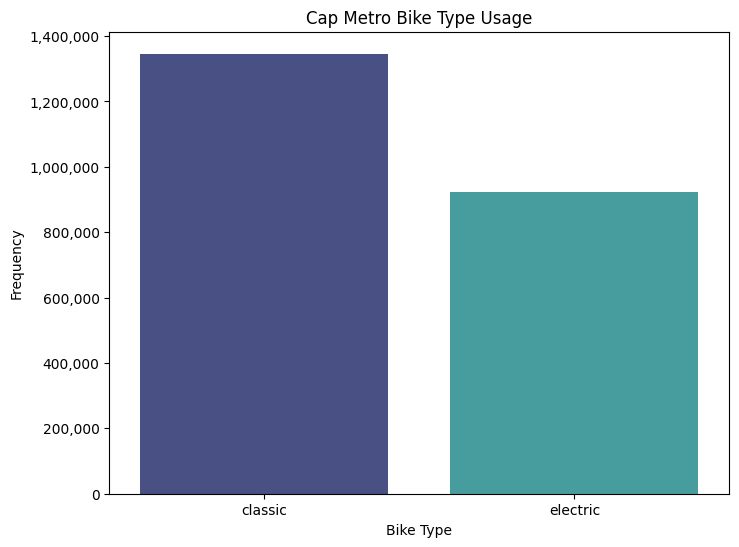

In [9]:
#Display
#Set the format for th y-axis to remove scientific notation
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(bike_types, palette='mako')
plt.title('Cap Metro Bike Type Usage')
plt.xlabel('Bike Type')
plt.ylabel('Frequency')
plt.show()

### Checkout Kiosk

In [44]:
#Get a unique list of all the checkout kiosk
df['checkout_kiosk'].unique()

array(['8th & Congress', '4th & Congress', 'Toomey Rd @ South Lamar',
       '3rd & West', 'Dean Keeton & Speedway', 'Plaza Saltillo',
       'Boardwalk West', '17th & Guadalupe', 'Nueces @ 3rd',
       'Barton Springs Pool', '6th & Brazos', '5th & Bowie',
       'Zilker Park', '2nd & Congress', 'Guadalupe & 6th',
       '6th & Congress', '11th & San Jacinto', 'Rainey St @ Cummings',
       'Riverside & South Lamar', 'South Congress & Academy',
       'East 11th & Victory Grill', 'Palmer Auditorium',
       'UT West Mall @ Guadalupe', 'Waller & 6th St.',
       'Barton Springs & Riverside', 'East 6th & Medina', '6th & Lavaca',
       '6th & Trinity', '6th & West', 'East 6th & Pedernales',
       'Long Center @ South 1st & Riverside',
       '3rd & Trinity @ The Convention Center',
       'South Congress & Elizabeth', '5th & San Marcos',
       'State Capitol @ 14th & Colorado',
       'Bullock Museum @ Congress & MLK',
       'Barton Springs & Bouldin @ Palmer Auditorium',
       'East

In [ ]:
#Find the top 25 most used checkout kiosk
checkout_kiosk = df['checkout_kiosk'].value_counts().head(25)
checkout_kiosk

checkout_kiosk
21st & Speedway @ PCL                       179675
Dean Keeton & Speedway                       95321
28th & Rio Grande                            65333
21st & Guadalupe                             64451
Riverside & South Lamar                      63125
26th & Nueces                                61886
Rainey St @ Cummings                         61452
Dean Keeton & Whitis                         60590
22nd & Pearl                                 55770
Zilker Park                                  49268
2nd & Lavaca @ City Hall                     48504
2nd & Congress                               48302
5th & Bowie                                  47269
3rd & West                                   45830
4th & Congress                               43403
Guadalupe & West Mall @ University Co-op     38691
11th & Congress @ The Texas Capitol          38472
21st & University                            37404
3rd & Trinity @ The Convention Center        34065
23rd & San Jacin

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\3165215007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(checkout_kiosk, orient='h', palette='mako')


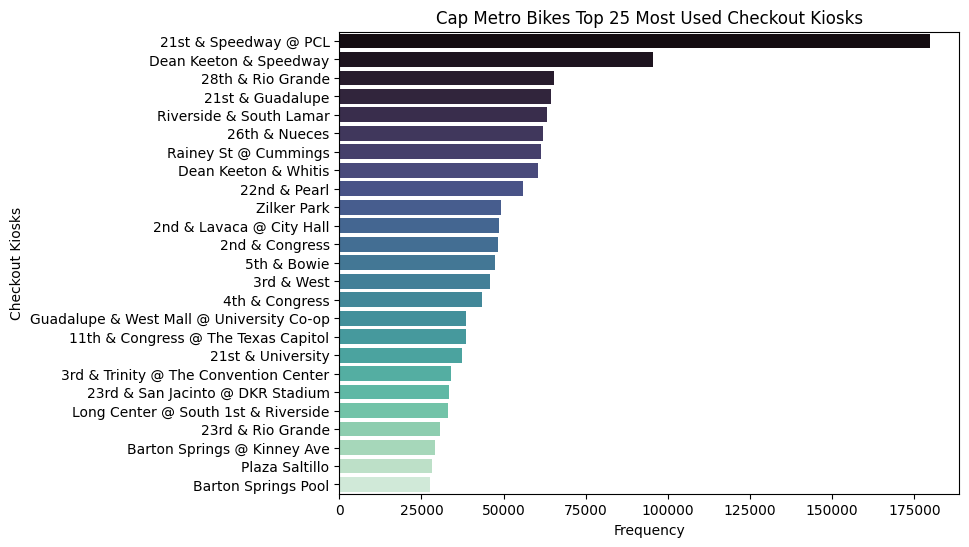

In [12]:
#Visualize
sns.barplot(checkout_kiosk, orient='h', palette='mako')
plt.title('Cap Metro Bikes Top 25 Most Used Checkout Kiosks')
plt.ylabel('Checkout Kiosks')
plt.xlabel('Frequency')
plt.show()

### Return Kiosk

In [53]:
#Get a unique list of return kiosk
df['return_kiosk'].unique()

array(['4th & Congress', 'Riverside & South Lamar', '8th & Congress',
       'Long Center @ South 1st & Riverside', 'Boardwalk West',
       'Zilker Park', '3rd & West', 'Barton Springs Pool',
       'Sterzing @ Barton Springs', 'East 6th & Medina', '6th & Brazos',
       '6th & Congress', '5th & Bowie', '2nd & Lavaca @ City Hall',
       '21st & Guadalupe', 'Palmer Auditorium', '6th & West',
       '6th & Trinity', '2nd & Congress', 'South Congress & Academy',
       'Davis at Rainey Street', '5th & San Marcos', '6th & Lavaca',
       'UT West Mall @ Guadalupe', '8th & San Jacinto', 'Plaza Saltillo',
       'South Congress & Elizabeth', 'Barton Springs @ Kinney Ave',
       '3rd & Trinity @ The Convention Center', 'Rainey & Davis',
       'Rainey @ River St', 'State Capitol @ 14th & Colorado',
       'Rainey @ Cummings', 'Barton Springs & Riverside',
       'Dean Keeton & Speedway', 'Toomey Rd @ South Lamar',
       '12th & San Jacinto @ State Capitol Visitors Garage',
       '4th & G

In [14]:
#Get the top 25 most used Return Kiosks
return_kiosks = df['return_kiosk'].value_counts().head(25)
return_kiosks

return_kiosk
21st & Speedway @ PCL                       183330
Dean Keeton & Speedway                      103268
21st & Guadalupe                             63354
Riverside & South Lamar                      61956
28th & Rio Grande                            61309
Rainey @ Cummings                            59865
Dean Keeton & Whitis                         59485
26th & Nueces                                56824
2nd & Lavaca @ City Hall                     54526
Zilker Park                                  53467
2nd & Congress                               51933
22nd & Pearl                                 50064
4th & Congress                               47551
5th & Bowie                                  45284
3rd & West                                   44438
23rd & San Jacinto @ DKR Stadium             40970
21st & University                            38367
Guadalupe & West Mall @ University Co-op     37696
3rd & Trinity @ The Convention Center        36873
Long Center @ Sout

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\2572403433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(return_kiosks, orient='h', palette='mako')


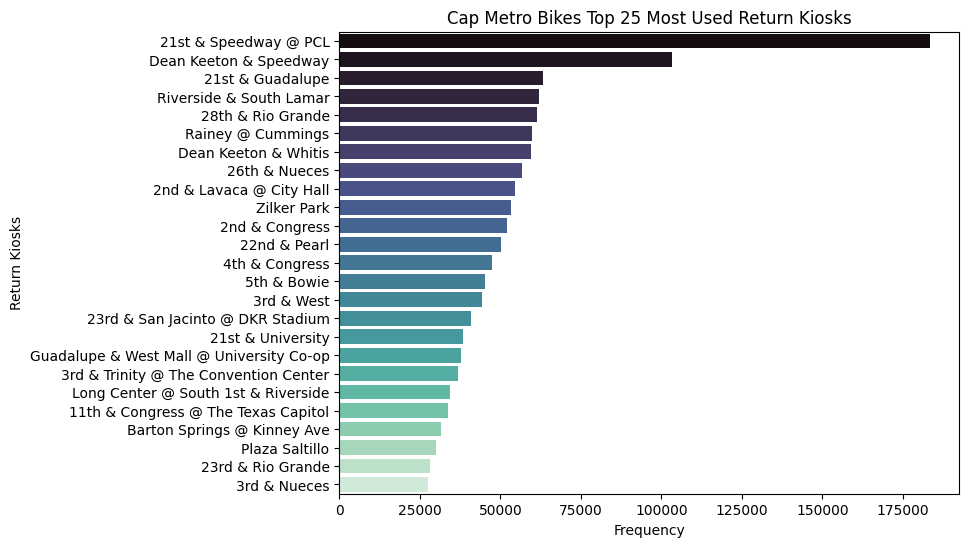

In [15]:
#Visualize
sns.barplot(return_kiosks, orient='h', palette='mako')
plt.title('Cap Metro Bikes Top 25 Most Used Return Kiosks')
plt.ylabel('Return Kiosks')
plt.xlabel('Frequency')
plt.show()

### Trip Duration

In [6]:
#Get statistics table of trip duration 
df[['trip_duration_minutes']].describe()

,trip_duration_minutes
count,2269215.00
mean,27.06
std,70.25
min,2.00
25%,6.00
50%,11.00
75%,27.00
max,1439.00


The table below shows the summary statistics for the trip durations of Capital Metro Bikes:

- **Mean**: The average trip duration is 27.06 minutes. This indicates that, on average, trips are around 27 minutes long.
- **Standard Deviation**: The standard deviation is 70.25 minutes, showing a high level of variability in trip durations. This indicates that there are many trips that vary significantly in length, with a few being much longer or shorter than the mean.
- **Minimum**: The shortest trip duration is 2 minutes, indicating that there are very short trips recorded.
- **25th Percentile (Q1)**: The first quartile (Q1) is 6 minutes, meaning 25% of the trips are 6 minutes or shorter.
- **50th Percentile (Median)**: The median trip duration is 11 minutes, meaning half of the trips are shorter than 11 minutes and half are longer.
- **75th Percentile (Q3)**: The third quartile (Q3) is 27 minutes, meaning 75% of trips are 27 minutes or shorter.
- **Maximum**: The longest trip recorded lasts 1,439 minutes (about 1 day), which is likely an outlier compared to the rest of the trip durations.

**Interpretation:**

The data shows a large amount of variability in bike trip durations. The distribution is highly skewed, with a few very long trips inflating the mean. The range is 1,437 minutes (about 1 day), and the standard deviation is 70 minutes, which is quite high compared to the mean of 27 minutes. This indicates that the trip durations vary widely, and while the average trip duration is around 27 minutes, the median is much lower at 11 minutes, suggesting that most trips are relatively short. The minimum trip duration is 2 minutes, pointing to a substantial number of very brief trips as well. The large standard deviation further supports the idea of significant variability, likely due to a small number of long outlier trips.

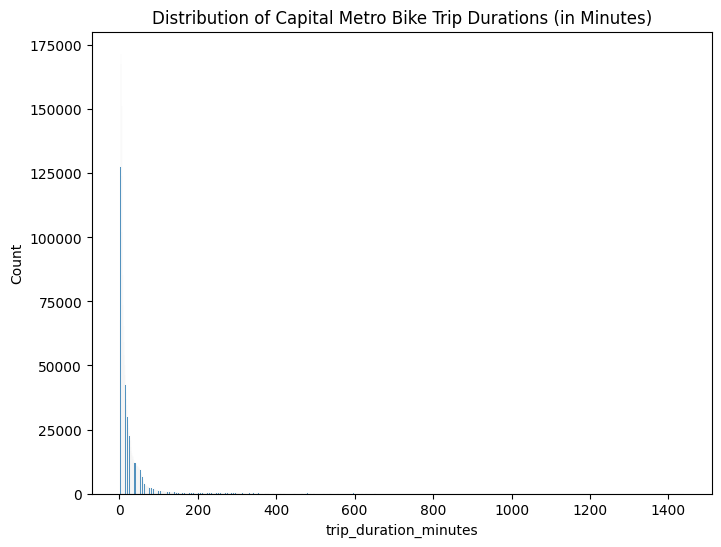

In [74]:
#Display
sns.histplot(df['trip_duration_minutes'])
plt.title('Distribution of Capital Metro Bike Trip Durations (in Minutes)')
plt.show()

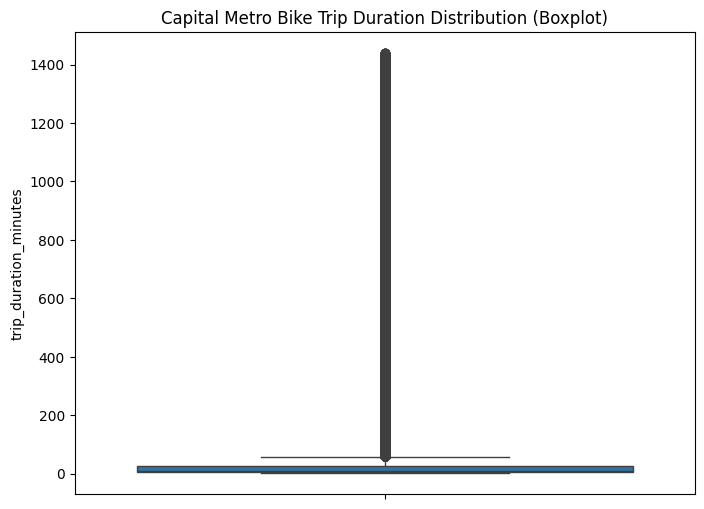

In [75]:
#Display
sns.boxplot(df['trip_duration_minutes'])
plt.title('Capital Metro Bike Trip Duration Distribution (Boxplot)')
plt.show()

**As seen in the statistics table and the two visualizations, there is significant variability in the trip durations for Capital Metro Bikes. To address this and better visualize the distribution, I will apply a log transformation and replot the histogram and boxplot.**

In [7]:
#Apply log transformation on trip_duration 
import numpy as np
df['log_trip_duration'] = np.log(df['trip_duration_minutes'])

In [8]:
#Get stats table
df[['log_trip_duration']].describe()

,log_trip_duration
count,2269215.00
mean,2.57
std,1.07
min,0.69
25%,1.79
50%,2.40
75%,3.30
max,7.27


- **Mean**: The average log-transformed trip duration is 2.57, which corresponds to an original trip duration of about 13 minutes (since the log of 13 is approximately 2.57).
- **Standard Deviation**: The standard deviation is 1.07, indicating moderate variability in the log-transformed data.
- **Minimum**: The shortest trip duration, after transformation, is 0.69, which corresponds to an original trip duration of about 2 minutes (since the log of 2 is approximately 0.69).
- **25th Percentile (Q1)**: 1.79, corresponding to an original trip duration of about 6 minutes.
- **50th Percentile (Median)**: 2.40, corresponding to an original trip duration of about 11 minutes.
- **75th Percentile (Q3)**: 3.30, corresponding to an original trip duration of about 27 minutes.
- **Maximum**: The longest trip duration in the log-transformed data is 7.27, which corresponds to an original trip duration of about 1,440 minutes (or 1 day).

**Interpretation:**

The log transformation has reduced the skewness of the data and compressed the range of trip durations. The mean log-transformed trip duration (2.57) is much closer to the median (2.40), indicating that the data is now more normally distributed now. The transformation also reduces the impact of extreme values, such as the very long trip durations, which were disproportionately influencing the original distribution.

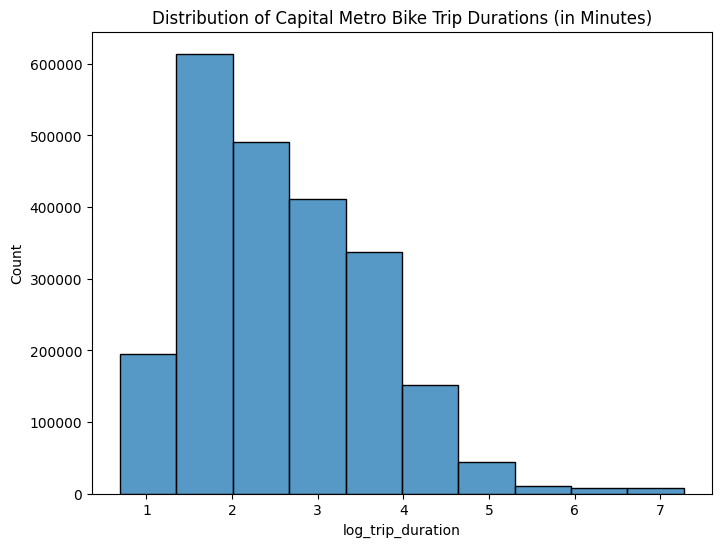

In [12]:
#Redo histogram
sns.histplot(df['log_trip_duration'], bins=10)
plt.title('Distribution of Capital Metro Bike Trip Durations (in Minutes)')
plt.show()

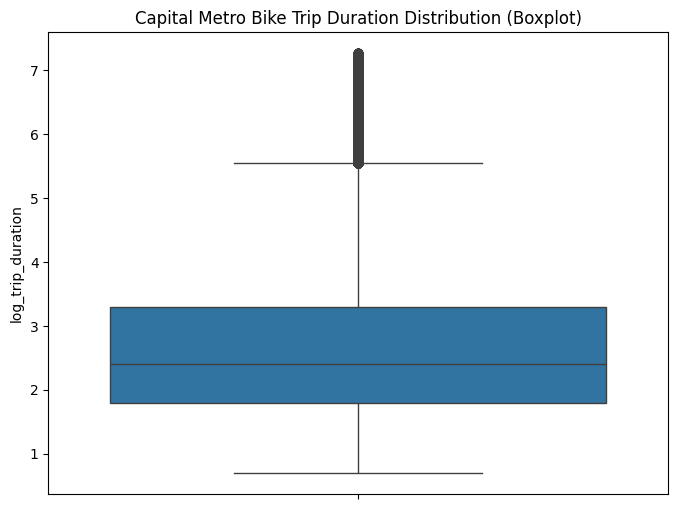

In [85]:
#Redo boxplot
#Display
sns.boxplot(df['log_trip_duration'])
plt.title('Capital Metro Bike Trip Duration Distribution (Boxplot)')
plt.show()

### Month

In [20]:
#Get value counts
months = df['month'].value_counts()
months

month
3     304629
4     263552
10    254620
9     221021
5     207311
6     165392
11    163800
2     161445
7     148506
8     147252
1     119081
12    112606
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\2109617037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(months, palette='mako')


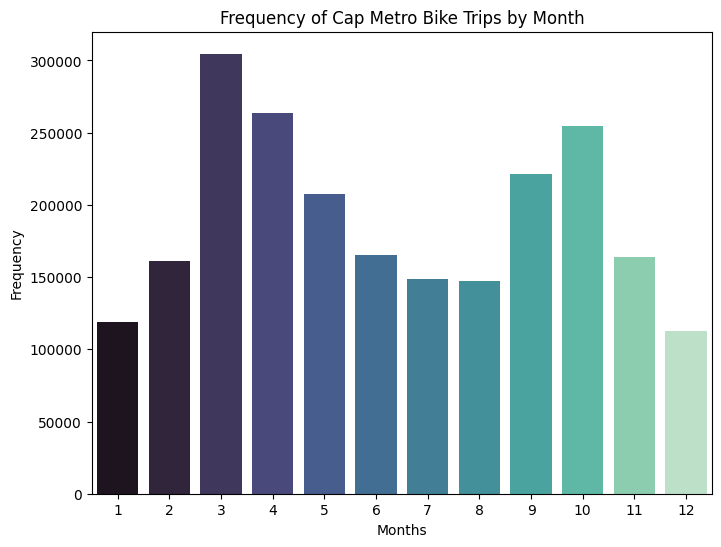

In [21]:
#Display
sns.barplot(months, palette='mako')
plt.title('Frequency of Cap Metro Bike Trips by Month')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Apply function to classify seasons
def seasons(x):
    if x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'
    elif x in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'
#Apply function
df['season'] = df['month'].apply(seasons)

#Check value counts
season = df['season'].value_counts()
season

season
Spring    775492
Fall      639441
Summer    461150
Winter    393132
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\3024782165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(season, palette='mako')


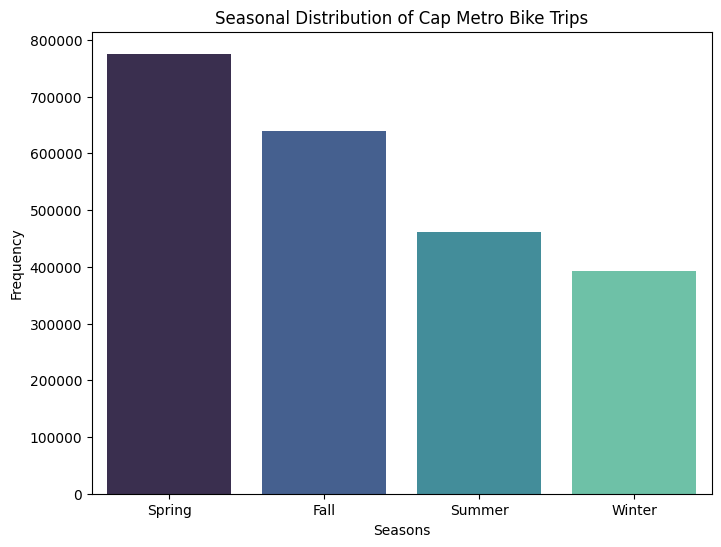

In [23]:
#Display
sns.barplot(season, palette='mako')
plt.title('Seasonal Distribution of Cap Metro Bike Trips')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.show()

### Year

In [24]:
#Get stats table
df[['year']].describe()

,year
count,2269215.00
mean,2019.23
std,3.06
min,2013.00
25%,2017.00
50%,2019.00
75%,2022.00
max,2024.00


In [29]:
#Get frequency of bike trips per year
year = df['year'].value_counts()
year

year
2018    385560
2022    316859
2023    283852
2021    223879
2016    194386
2017    187796
2015    176115
2014    150216
2024    141112
2019    106511
2020    101511
2013      1418
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_7736\2701807389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(year, palette='mako')


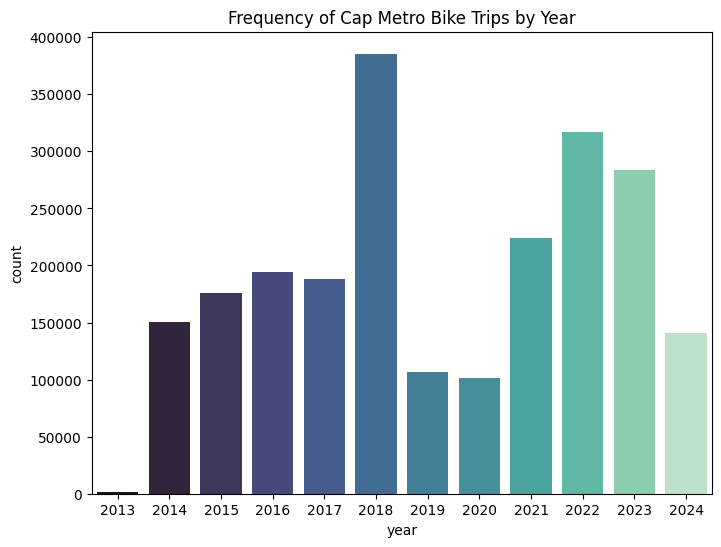

In [109]:
#Display
sns.barplot(year, palette='mako')
plt.title('Frequency of Cap Metro Bike Trips by Year')
plt.show()

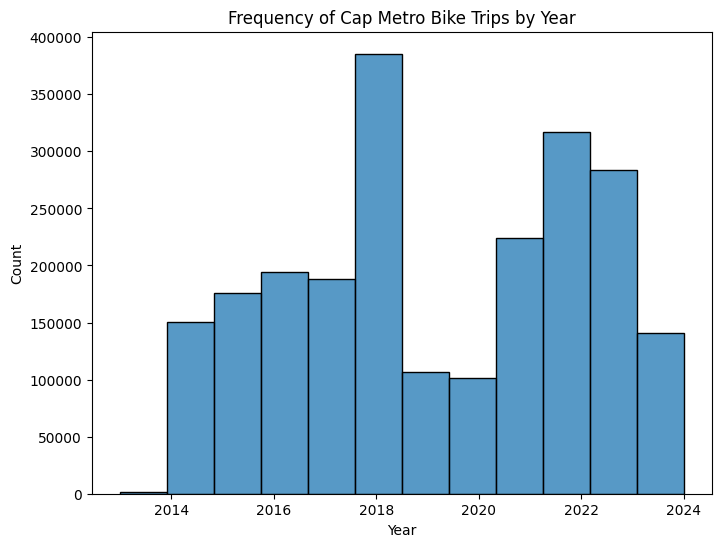

In [15]:
#Histogram
sns.histplot(df['year'],bins=12)
plt.title('Frequency of Cap Metro Bike Trips by Year')
plt.xlabel('Year')
plt.show()

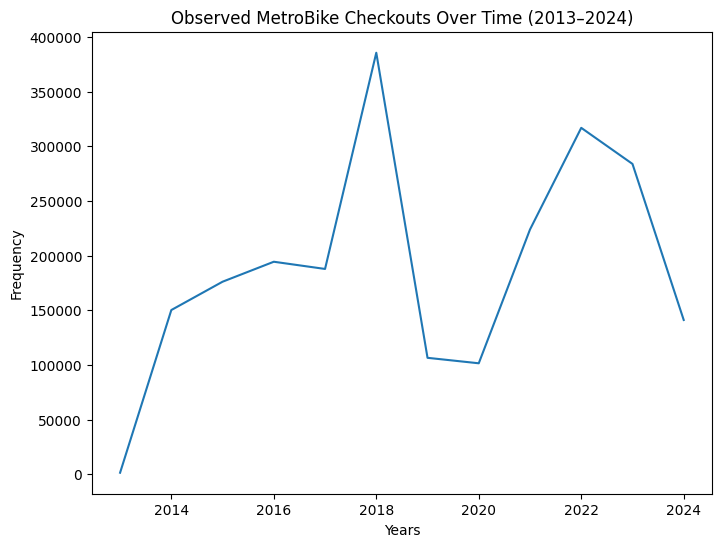

In [31]:
#Line plot
sns.lineplot(year)
plt.title('Observed MetroBike Checkouts Over Time (2013–2024)')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

### Time of Day

In [32]:
#Get frequency table
time_of_day = df['time_of_day'].value_counts()
time_of_day

time_of_day
PM    1711670
AM     557545
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\3702446795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(time_of_day, palette='mako')


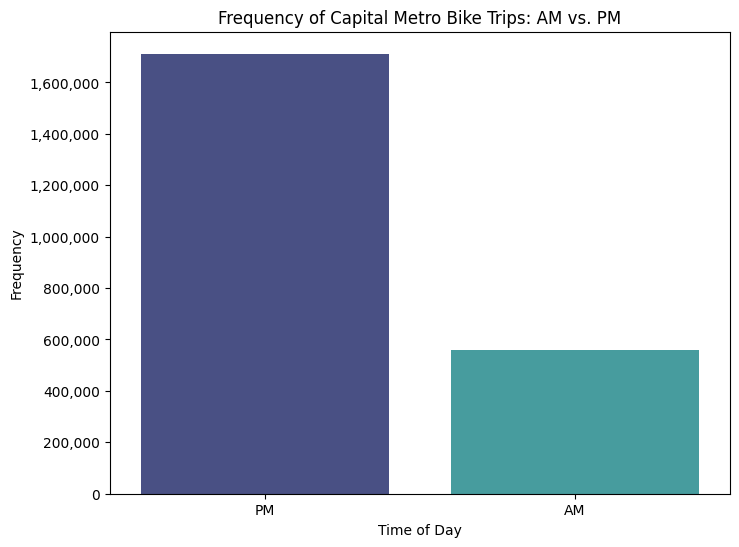

In [ ]:
#Display
sns.barplot(time_of_day, palette='mako')
#Set the format for the y-axis to remove scientific notation
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Frequency of Capital Metro Bike Trips: AM vs. PM')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()

### Day of Week

In [34]:
#Get frequency table
day_of_week = df['day_of_week'].value_counts()
day_of_week

day_of_week
Saturday     399709
Sunday       345672
Friday       343988
Monday       303923
Thursday     300276
Wednesday    288321
Tuesday      287326
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\681045140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(day_of_week, palette='mako')


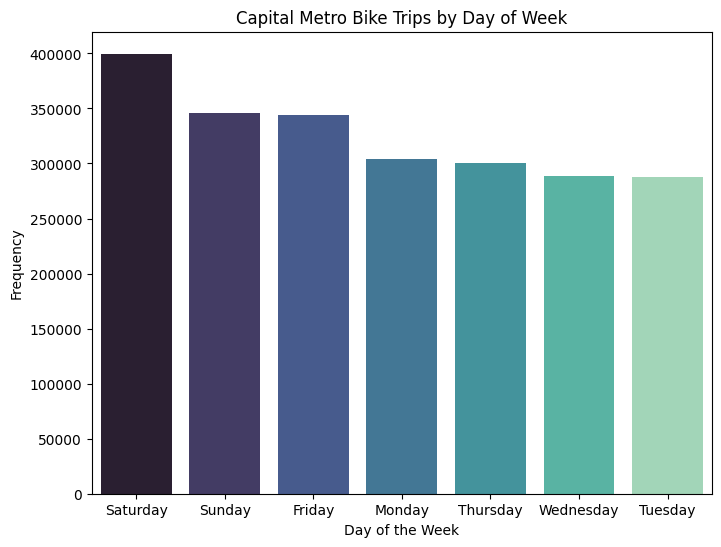

In [36]:
#Display
sns.barplot(day_of_week, palette='mako')
plt.title('Capital Metro Bike Trips by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

### Checkout Day

In [18]:
#Get stats table
df[['checkout_day']].describe()

,checkout_day
count,2269215.00
mean,15.53
std,8.78
min,1.00
25%,8.00
50%,15.00
75%,23.00
max,31.00


In [24]:
#Get frequency table
checkout_day = df['checkout_day'].value_counts()
checkout_day

checkout_day
14    81555
15    80293
13    78691
10    77925
12    77754
5     77718
6     77331
4     76815
18    75553
2     75531
3     75333
16    75174
9     75080
7     74989
8     74848
11    74830
1     74549
19    74265
28    73790
27    73625
17    73301
25    73058
26    73054
29    71959
20    70799
24    69050
22    68848
30    67981
23    67912
21    67476
31    40128
Name: count, dtype: int64

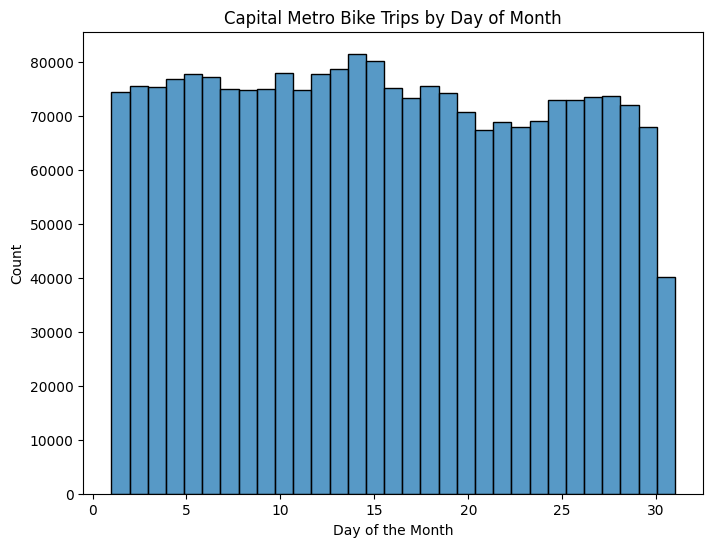

In [17]:
#Histogram
sns.histplot(df['checkout_day'],bins=31)
plt.title('Capital Metro Bike Trips by Day of Month')
plt.xlabel('Day of the Month')
plt.show()

### Hour of Day

In [40]:
#Get stats table
df[['hour']].describe()

,hour
count,2269215.00
mean,14.44
std,4.67
min,0.00
25%,12.00
50%,15.00
75%,18.00
max,23.00


In [35]:
#Get frequency table
hour_of_day = df['hour'].value_counts()
hour_of_day

hour
17    190661
16    184754
15    183556
13    180643
14    175097
12    173339
18    172155
11    143857
19    143402
10    113821
20    112247
9      92055
21     85961
8      71719
22     65587
23     44268
7      41857
0      29503
1      20751
2      16745
6      12889
3       5990
5       5071
4       3287
Name: count, dtype: int64

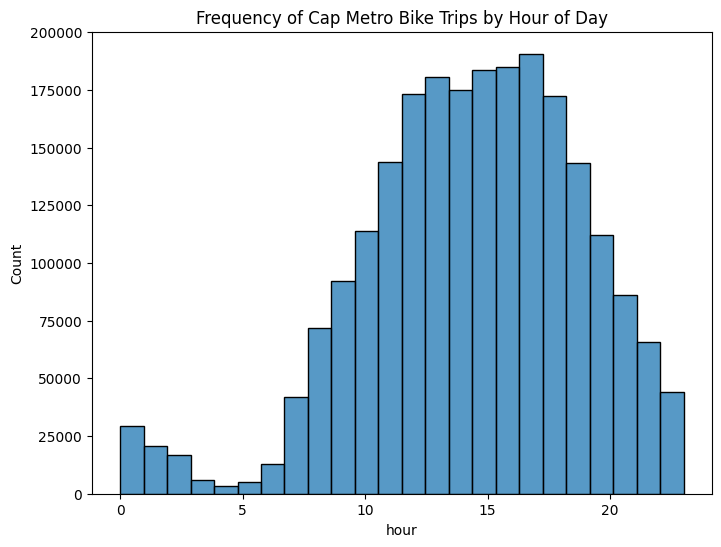

In [39]:
#Display
sns.histplot(df['hour'], bins=24)
plt.title('Frequency of Cap Metro Bike Trips by Hour of Day')
plt.show()

### Time Period

**Time Period Classification**

- Morning Commute
    - **Hours**: 7 - 9 AM

- Lunch Break
    - **Hours**: 11 AM - 2 PM

- Afternoon Surge
    - **Hours**: 2 - 4 PM

- Evening Rush
    - **Hours**: 4 - 6 PM

- Evening Leisure
    - **Hours**: 6 - 9 PM

- Late Night
    - **Hours**: 9 PM - 12 AM

- Off-Peak
    - **Hours**: 12 - 6 AM

In [38]:
#Get frequency table
time_period  = df['time_period'].value_counts()
time_period

time_period
Lunch Break        497839
Evening Leisure    427804
Evening Rush       375415
Afternoon Surge    358653
Off-Peak           300112
Late Night         195816
Morning Commute    113576
Name: count, dtype: int64

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_3424\2595458114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(time_period, palette='mako', orient='h')


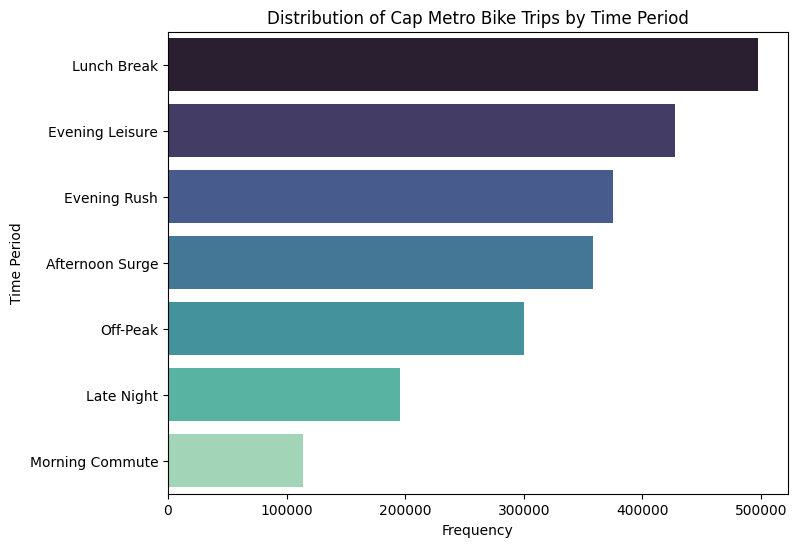

In [39]:
#Display
sns.barplot(time_period, palette='mako', orient='h')
plt.title('Distribution of Cap Metro Bike Trips by Time Period')
plt.xlabel('Frequency')
plt.ylabel('Time Period')
plt.show()

### **Univariate Takeways**

**Membership Type:** 

The analysis of Cap Metro Bikes memberships reveals that Student Membership is the most popular, with 430,314 uses, followed by Local365 at 389,214 and UT Student Membership at 289,045, indicating strong engagement among students and local residents. The 24 Hour Walk Up Pass and Walk Up options also see significant usage at 272,371 and 259,842 trips, respectively, suggesting convenience for occasional riders. Other memberships like Local31, Explorer, and Pay-as-you-ride show moderate usage, while shorter-term options such as 3-Day Weekender and Weekender have lower counts. This distribution highlights a preference for long-term and student-focused memberships. 

**Bike Type:** 

The analysis of Cap Metro Bike type usage shows that classic bikes are more frequently used, with 1,346,101 trips compared to electric bikes, which account for 923,114 trips. This indicates a preference for traditional bikes, possibly due to their availability, familiarity, or cost-effectiveness. The data suggests that while electric bikes are popular, classic bikes remain the dominant choice among riders, reflecting user behavior and potential opportunities to promote electric bike usage to balance demand.

**Checkout Kiosk:** 

It's evident that Cap Metro Bikes are heavily utilized around the University of Texas (UT) area, with 21st & Speedway @ PCL being the most used checkout kiosk at 179,675 checkouts, likely due to its proximity to campus and high foot traffic. Other kiosks near UT, such as Dean Keeton & Speedway (95,321 checkouts), 28th & Rio Grande (65,333 checkouts), and 21st & Guadalupe (64,451 checkouts), also show significant usage, reinforcing the high demand for bikes in this area. Additionally, kiosks like Dean Keeton & Whitis (60,590 checkouts) and 22nd & Pearl (55,770 checkouts) further highlight the concentration of bike activity around UT, likely driven by student and faculty commuting needs. This aligns with the earlier observation of peak usage during lunch and evening hours, suggesting that bikes are a popular transportation option for navigating the campus and surrounding areas. The data underscores the importance of maintaining bike availability and infrastructure in this high-demand zone to support the community's mobility needs.

**Return Kiosk:** 

The data shows that many of the locations where Cap Metro Bikes are checked out are also the same places where they are frequently returned, particularly around the UT campus. For instance, 21st & Speedway @ PCL leads with 183,330 returns, closely mirroring its high checkout count, followed by Dean Keeton & Speedway with 103,268 returns. Other kiosks like 21st & Guadalupe (63,354 returns), Riverside & South Lamar (61,956 returns), and 28th & Rio Grande (61,309 returns) also show significant return activity, reinforcing the heavy usage of bikes in this area.

This pattern suggests that many users are likely making round trips or short commutes within the UT vicinity, further emphasizing the importance of these kiosks for student and faculty mobility. The consistency between checkout and return locations highlights the central role of UT's campus as a hub for bike activity, aligning with earlier observations of peak usage during commuting and leisure hours. Maintaining and optimizing bike availability at these high-traffic kiosks is crucial to support the ongoing demand and ensure efficient bike-sharing operations in the area.

**Trip Duration:** 

In summary, while the average trip duration is around 27 minutes, the median of 11 minutes is a more accurate representation of typical usage, as the data is heavily skewed by a small number of long trips. The log transformation confirms that most trips are short, with the majority falling within a 6 to 27-minute range, aligning with the high activity observed during peak commuting and leisure hours around UT's campus. This insight can help optimize bike availability and maintenance schedules to better meet the needs of users who primarily engage in shorter trips.

**Month/Season:** 

The data clearly indicates that Spring and Fall are the peak seasons for Cap Metro Bike usage, with Spring leading at 775,492 trips and Fall following closely with 639,441 trips. This aligns with the monthly breakdown, where March (304,629 trips), April (263,552 trips), September (221,021 trips), and October (254,620 trips) show the highest activity. These months likely offer favorable weather conditions, making biking more appealing for commuting and leisure.

In contrast, Summer and Winter see lower usage, with 461,150 and 393,132 trips respectively. The drop in Summer could be due to hotter temperatures, while Winter likely sees reduced activity because of colder weather. Monthly data supports this, with July (148,506 trips), August (147,252 trips), January (119,081 trips), and December (112,606 trips) showing the lowest numbers.

This seasonal pattern suggests that weather plays a significant role in bike usage, with Spring and Fall being the most active periods. Understanding these trends can help optimize bike availability and maintenance schedules to meet demand during peak seasons while planning for lower usage in Summer and Winter.

**Year:** 

Most of the available data for Cap Metro Bike trips comes from 2018, which accounts for 385,560 recorded trips, making it the year with the highest representation in the dataset. This is followed by 2022 (316,859 trips) and 2023 (283,852 trips), indicating that these years also contribute significantly to the dataset. The data spans from 2013 to 2024, with 2013 having the fewest recorded trips at 1,418, likely reflecting the early stages of the bike-sharing system or data collection.

The mean year of the data is 2019.23, with a standard deviation of 3.06, showing that the majority of the data is clustered around the late 2010s and early 2020s. The median year is 2019, further supporting this concentration. While 2016 (194,386 trips) and 2017 (187,796 trips) also contribute a substantial number of trips, the years 2020 (101,511 trips) and 2021 (223,879 trips) show some variability, which could be influenced by factors like changes in ridership patterns or data collection methods.

It's important to note that this dataset excludes trips shorter than 2 minutes, so it may not fully capture all bike usage. However, based on the available data, 2018, 2022, and 2023 stand out as the years with the most recorded trips, providing a solid foundation for analyzing ridership patterns during these periods.

**Time of Day:** 


The data clearly shows that afternoon and evening (PM) periods are the most popular times for Cap Metro Bike usage, with 1,711,670 trips recorded, significantly higher than the morning (AM) usage of 557,545 trips. This aligns with earlier observations of peak activity during the Evening Rush (4:00 PM to 6:00 PM) and Evening Leisure (6:00 PM to 9:00 PM) periods. Additionally, the Lunch Break period (11:00 AM to 2:00 PM) is also very popular, with 497,839 trips, indicating that many riders use bikes during midday for errands or short commutes.

The preference for PM usage likely reflects commuting patterns, with many riders using bikes to return home from work or school, as well as for recreational activities in the evening. The high activity during lunch breaks further highlights the versatility of bike usage for short, midday trips. In contrast, the lower AM usage suggests that while bikes are still used for morning commutes, they are less frequently chosen compared to afternoon and evening trips. This pattern underscores the importance of ensuring bike availability and maintenance during peak PM and lunch hours to meet the high demand, while also considering strategies to encourage more AM usage to balance ridership throughout the day.

**Day of Week:** 

The distribution of Cap Metro Bike trips across the week is relatively even, but there is a noticeable increase in usage towards the end of the week, particularly from Friday to Sunday. Saturday has the highest number of trips at 399,709, followed by Sunday with 345,672 trips and Friday with 343,988 trips. This suggests that weekends and the start of the weekend (Friday) are particularly popular times for bike usage, likely due to a combination of leisure activities, errands, and reduced reliance on other forms of transportation.

In contrast, the weekdays from Monday to Thursday show slightly lower but still significant usage, with trips ranging from 287,326 on Tuesday to 303,923 on Monday. This indicates that bikes are consistently used throughout the week, but the spike in ridership on weekends highlights the importance of bikes for recreational and non-commuting purposes during these days.

This pattern suggests that while bikes are a reliable mode of transportation for daily commutes during the week, they are especially popular for weekend activities. Ensuring adequate bike availability and maintenance during these peak weekend days could help meet the increased demand and enhance user satisfaction. 

**Checkout Day:** 

The data shows a fairly even distribution of Cap Metro Bike trips across the days of the month, with no single day standing out as significantly more popular. The mean and median checkout day is around the 15th, with a standard deviation of 8.78, indicating consistent usage throughout the month. Days like the 14th (81,555 trips) and 15th (80,293 trips) have slightly higher counts, but the differences are minimal compared to other days. The only notable drop occurs on the 31st (40,128 trips), likely because not all months have 31 days.

This even distribution suggests that bike usage is not influenced by specific days of the month, indicating consistent demand driven by daily commuting and leisure needs rather than monthly trends or events.

**Hour of Day:** 

The data shows peak usage between 15:00 (3 PM) and 18:00 (6 PM), with the highest number of trips at 17:00 (5 PM) at 190,661, likely due to evening commutes. Morning usage rises from 7:00 AM, peaking at 9:00 AM with 92,055 trips, reflecting morning commutes. Activity remains steady from 12:00 (noon) to 14:00 (2 PM), but declines significantly after 21:00 (9 PM), with the lowest usage between 3:00 AM and 6:00 AM, hitting a minimum of 3,287 trips at 4:00 AM. The median hour is 15:00 (3 PM), and the standard deviation of 4.67 indicates moderate variability. These patterns align with daily routines, suggesting opportunities to optimize bike availability during peak hours and promote usage during off-peak times.

**Time Period:** 

The distribution of Cap Metro Bike trips by time period complements the hourly data, reinforcing the patterns observed throughout the day. The Lunch Break (11:00 AM to 2:00 PM) stands out with 497,839 trips, aligning with the high activity seen between 12:00 PM and 14:00 PM in the hourly data. Similarly, the Evening Rush (4:00 PM to 6:00 PM) and Evening Leisure (6:00 PM to 9:00 PM) periods, with 375,415 and 427,804 trips respectively, correspond to the peak hours of 15:00 to 18:00 in the hourly data, reflecting evening commuting and recreational use. The Afternoon Surge (2:00 PM to 4:00 PM) at 358,653 trips further supports the steady afternoon activity observed.

In contrast, the Morning Commute (7:00 AM to 9:00 AM) has the lowest number of trips at 113,576, consistent with the gradual rise in hourly trips starting at 7:00 AM and peaking at 9:00 AM. The Off-Peak and Late Night periods, with 300,112 and 195,816 trips respectively, align with the significantly lower usage during early morning (3:00 AM to 6:00 AM) and late evening (21:00 PM onwards) hours. Together, these insights highlight a clear correlation between time periods and hourly usage, emphasizing peak demand during midday and evening hours, and lower activity during early mornings and late nights, providing a comprehensive view for optimizing bike availability and promoting usage during off-peak times.

## Bivariate Analysis (2 Variables)

In [31]:
#Save csv for SQL purposes
df.to_csv('Austin_CapMetro_Bike_Trips.csv', index=False)

In [9]:
df.head()

,trip_id,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,month,year,time_of_day,day_of_week,checkout_day,hour,time_period,log_trip_duration
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,2017-12-01,09:51:41,2496,8th & Congress,2495,4th & Congress,3,12,2017,AM,Friday,1,9,Off-Peak,1.10
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,2015-03-13,16:20:24,2495,4th & Congress,2495,4th & Congress,14,3,2015,PM,Friday,13,16,Evening Rush,2.64
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,2575,Riverside & South Lamar,22,10,2014,AM,Tuesday,14,8,Morning Commute,3.09
3,3454592,Local365,646,classic,10/14/2014 08:32:03 AM,2014-10-14,08:32:03,2552,3rd & West,2496,8th & Congress,29,10,2014,AM,Tuesday,14,8,Morning Commute,3.37
4,4106421,24 Hour Walk Up Pass,124,classic,03/13/2015 04:20:15 PM,2015-03-13,16:20:15,2498,Dean Keeton & Speedway,2549,Long Center @ South 1st & Riverside,10,3,2015,PM,Friday,13,16,Evening Rush,2.30


### Trip Duration vs Bike Type

In [30]:
df.groupby('bike_type')['log_trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
bike_type,,,,,,,,
classic,1346101.00,2.65,1.06,0.69,1.79,2.56,3.33,7.27
electric,923114.00,2.44,1.07,0.69,1.61,2.30,3.26,7.27


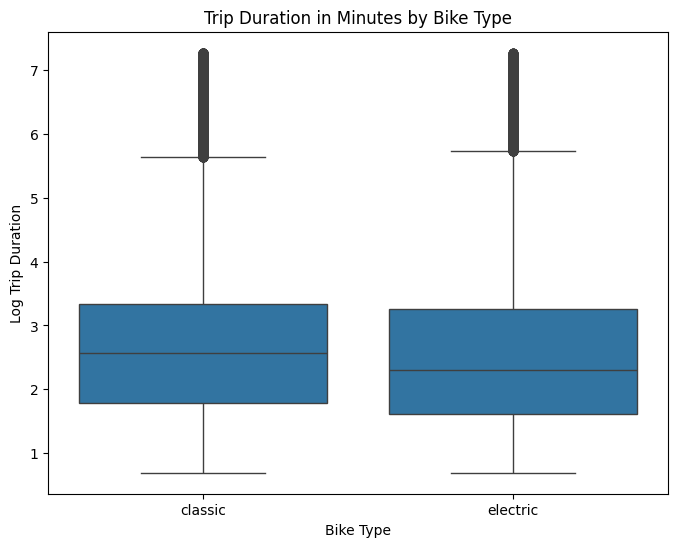

In [12]:
#Display
sns.boxplot(x='bike_type', y='log_trip_duration', data=df)
plt.title('Trip Duration in Minutes by Bike Type')
plt.xlabel('Bike Type')
plt.ylabel('Log Trip Duration')
plt.show()

**Not finished with the Bivariate Analysis yet**

## Most Popular Routes

I created the `route` column to represent the most popular bike routes by combining the `checkout_kiosk` and `return_kiosk` columns. This allows me to analyze trip patterns more effectively, identifying the most frequently traveled paths. I included a `" to "` separator for clarity and flagged round trips where the checkout and return locations are the same. This distinction helps differentiate between one-way trips and users who return to the same station, providing deeper insights into bike usage behavior.

In [9]:
#Create new column called "route" to represent the trips taken by customers
df['route'] = df['checkout_kiosk'] + ' to ' + df['return_kiosk']

In [10]:
#Specify 'round trip' if the locations are the same 
df.loc[df["checkout_kiosk"] == df["return_kiosk"], "route"] += " (Round Trip)"

Standardize route names by ensuring that each route is always represented in the same order. Sorting the kiosk names alphabetically ensures that "A to B" and "B to A" are treated as the same route. This helps in aggregating trip counts accurately without duplicate reverse routes.


For instance: 


21st & Speedway @ PCL to Dean Keeton & Speedway

Dean Keeton & Speedway to 21st & Speedway @ PCL  


become: 
21st & Speedway @ PCL to Dean Keeton & Speedway

In [11]:
df['route'].value_counts().head(5)

route
21st & Speedway @ PCL to Dean Keeton & Speedway    31429
Dean Keeton & Speedway to 21st & Speedway @ PCL    29034
Dean Keeton & Whitis to 21st & Speedway @ PCL      26738
21st & Speedway @ PCL to Dean Keeton & Whitis      24522
26th & Nueces to 21st & Speedway @ PCL             17527
Name: count, dtype: int64

In [12]:
#Standardize routes
df["route"] = df.apply(
    lambda x: f"{x['checkout_kiosk']} to {x['return_kiosk']}" 
    if x["checkout_kiosk"] < x["return_kiosk"] 
    else f"{x['return_kiosk']} to {x['checkout_kiosk']}", 
    axis=1
)

In [13]:
#Display max column width 
pd.set_option('display.max_colwidth',None)

In [21]:
#Check results
df[['checkout_kiosk','return_kiosk','route']].head()

,checkout_kiosk,return_kiosk,route
0,8th & Congress,4th & Congress,4th & Congress to 8th & Congress
1,4th & Congress,4th & Congress,4th & Congress to 4th & Congress
2,Toomey Rd @ South Lamar,Riverside & South Lamar,Riverside & South Lamar to Toomey Rd @ South Lamar
3,3rd & West,8th & Congress,3rd & West to 8th & Congress
4,Dean Keeton & Speedway,Long Center @ South 1st & Riverside,Dean Keeton & Speedway to Long Center @ South 1st & Riverside


In [16]:
#Find top routes
routes = df['route'].value_counts().head(25)
routes

route
21st & Speedway @ PCL to Dean Keeton & Speedway                      60463
21st & Speedway @ PCL to Dean Keeton & Whitis                        51260
21st & Speedway @ PCL to 26th & Nueces                               31784
21st & Speedway @ PCL to 22nd & Pearl                                30687
21st & Guadalupe to 21st & Speedway @ PCL                            26895
21st & Speedway @ PCL to 28th & Rio Grande                           25805
21st & Speedway @ PCL to 23rd & Rio Grande                           18011
Riverside & South Lamar to Riverside & South Lamar                   17310
26th & Nueces to Dean Keeton & Speedway                              16735
21st & Speedway @ PCL to 21st & Speedway @ PCL                       16080
Zilker Park to Zilker Park                                           14747
21st & Speedway @ PCL to 23rd & San Jacinto @ DKR Stadium            14582
21st & Speedway @ PCL to Guadalupe & West Mall @ University Co-op    13922
Rainey @ Cummings t

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_23468\359649279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(routes, orient='h', palette='mako')


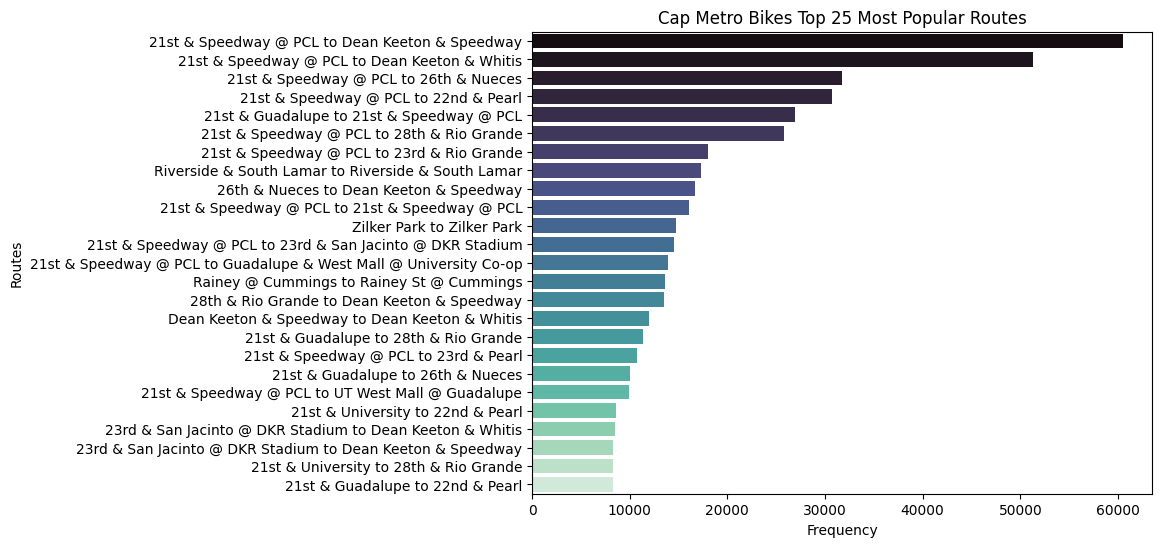

In [25]:
#Display
sns.barplot(routes, orient='h', palette='mako')
plt.title('Cap Metro Bikes Top 25 Most Popular Routes')
plt.xlabel('Frequency')
plt.ylabel('Routes')
plt.show()

## Recent Years (2018-2024)

Filtering the data is crucial for ensuring accuracy and relevance, especially when analyzing recent trends in bike usage. Since my dataset spans multiple years, focusing on trips from 2018 to 2024 ensures that the analysis reflects the most current and meaningful patterns. Older data may not be as relevant due to changes in bike availability, station locations, or user behavior. Since I don’t have any data from 2025, this timeframe should be sufficient for capturing reliable insights without including outdated or incomplete information.

In [23]:
df.head(3)

,trip_id,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,month,year,time_of_day,day_of_week,checkout_day,hour,time_period,season,log_trip_duration,route
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,2017-12-01,09:51:41,2496,8th & Congress,2495,4th & Congress,3,12,2017,AM,Friday,1,9,Off-Peak,Winter,1.098612,4th & Congress to 8th & Congress
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,2015-03-13,16:20:24,2495,4th & Congress,2495,4th & Congress,14,3,2015,PM,Friday,13,16,Evening Rush,Spring,2.639057,4th & Congress to 4th & Congress
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,2575,Riverside & South Lamar,22,10,2014,AM,Tuesday,14,8,Morning Commute,Fall,3.091042,Riverside & South Lamar to Toomey Rd @ South Lamar


In [15]:
df.to_csv('Updated CapMetro Bikes.csv',index=False)

## Find Top Grossing Areas

### Idea
- If I can connect the membership_type (price per membership) along with which kiosk used those memberships the most, I could figure out top grossing areas. 
- Website: 

https://www.capmetro.org/fares-passes 

https://www.capmetro.org/bikeshare